## Case Study is solved using stats model

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('ionosphere.csv')

In [48]:
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
5,1,0,0.02337,-0.00592,-0.09924,-0.11949,-0.00763,-0.11824,0.14706,0.06637,...,-0.01535,-0.03240,0.09223,-0.07859,0.00732,0.00000,0.00000,-0.00039,0.12011,0
6,1,0,0.97588,-0.10602,0.94601,-0.20800,0.92806,-0.28350,0.85996,-0.27342,...,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975,1
7,0,0,0.00000,0.00000,0.00000,0.00000,1.00000,-1.00000,0.00000,0.00000,...,1.00000,1.00000,1.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0
8,1,0,0.96355,-0.07198,1.00000,-0.14333,1.00000,-0.21313,1.00000,-0.36174,...,-0.65440,0.57577,-0.69712,0.25435,-0.63919,0.45114,-0.72779,0.38895,-0.73420,1
9,1,0,-0.01864,-0.08459,0.00000,0.00000,0.00000,0.00000,0.11470,-0.26810,...,-0.01326,0.20645,-0.02294,0.00000,0.00000,0.16595,0.24086,-0.08208,0.38065,0


In [49]:
df.Class.unique()

array([1, 0], dtype=int64)

# This is a Case Study of Classification and we have "Class" as our target variable with only 2 classes i.e  - 0 and 1

# Data Cleaning

In [50]:
df.shape

(351, 35)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
V1       351 non-null int64
V2       351 non-null int64
V3       351 non-null float64
V4       351 non-null float64
V5       351 non-null float64
V6       351 non-null float64
V7       351 non-null float64
V8       351 non-null float64
V9       351 non-null float64
V10      351 non-null float64
V11      351 non-null float64
V12      351 non-null float64
V13      351 non-null float64
V14      351 non-null float64
V15      351 non-null float64
V16      351 non-null float64
V17      351 non-null float64
V18      351 non-null float64
V19      351 non-null float64
V20      351 non-null float64
V21      351 non-null float64
V22      351 non-null float64
V23      351 non-null float64
V24      351 non-null float64
V25      351 non-null float64
V26      351 non-null float64
V27      351 non-null float64
V28      351 non-null float64
V29      351 non-null float64
V30      351 non-null float64

In [52]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.641026
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,1.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
df.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
V34      0
Class    0
dtype: int64

In [18]:
df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
V1,1.000000,NaN,0.302034,-0.006529,0.156152,0.127606,0.221867,0.027079,0.189242,-0.051883,...,0.149789,-0.203100,-0.010725,0.133632,-0.121415,0.167031,-0.100914,0.162962,0.010788,0.465614
V2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3,0.302034,NaN,1.000000,0.143365,0.476587,0.025768,0.440254,0.008717,0.471614,0.047916,...,-0.073202,0.077911,0.123345,0.344459,0.057890,0.246653,-0.009332,0.263343,0.000584,0.519145
V4,-0.006529,NaN,0.143365,1.000000,0.001152,-0.190308,-0.054030,0.255003,-0.302317,0.207697,...,-0.236987,-0.046910,0.000743,-0.041090,0.342301,-0.172276,-0.122788,-0.153964,0.034608,0.125884
V5,0.156152,NaN,0.476587,0.001152,1.000000,0.038323,0.597075,-0.029794,0.450454,-0.034236,...,-0.032254,0.140899,0.184517,0.257646,0.051068,0.399840,0.025681,0.383467,-0.099478,0.516477
V6,0.127606,NaN,0.025768,-0.190308,0.038323,1.000000,-0.010227,0.274747,-0.120712,0.200080,...,0.041787,-0.175433,-0.068775,-0.029392,-0.158090,-0.100240,0.316802,0.016899,0.185215,0.149099
V7,0.221867,NaN,0.440254,-0.054030,0.597075,-0.010227,1.000000,-0.150424,0.461889,-0.090268,...,0.087734,0.097566,0.109391,0.300632,-0.015158,0.415216,-0.008323,0.545881,-0.076460,0.450429
V8,0.027079,NaN,0.008717,0.255003,-0.029794,0.274747,-0.150424,1.000000,-0.336013,0.373567,...,-0.133023,-0.254130,0.072373,-0.139725,0.078585,-0.166682,0.152381,-0.200860,0.360610,0.207544
V9,0.189242,NaN,0.471614,-0.302317,0.450454,-0.120712,0.461889,-0.336013,1.000000,-0.251950,...,0.107478,0.172210,0.146817,0.329813,-0.031983,0.316021,-0.067499,0.344814,-0.095597,0.294852
V10,-0.051883,NaN,0.047916,0.207697,-0.034236,0.200080,-0.090268,0.373567,-0.251950,1.000000,...,-0.043680,-0.250947,0.072018,-0.123296,-0.008578,-0.155661,-0.015640,-0.203629,0.098104,0.120634


variable V2 have no significance in data as it is not corelated with any other variable.

In [54]:
df = df.drop('V2',axis=1)

In [55]:
df.head()

,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [131]:
y = df.Class

In [132]:
X = df.drop("Class",axis=1)

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100,stratify=y)

In [135]:
col = X_train.columns

Converting all values between 0 and 1 to make it easy for the machine to learn

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
logreg=LogisticRegression()

# Feature Engineering and Model Building

In [138]:
from sklearn.feature_selection import RFE

In [139]:
rfe=RFE(logreg,10)

In [140]:
rfe=rfe.fit(X_train,y_train)

Getting the Rankings of columns of trained data in rfe

In [141]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('V1', True, 1),
 ('V3', True, 1),
 ('V4', False, 21),
 ('V5', True, 1),
 ('V6', False, 11),
 ('V7', True, 1),
 ('V8', True, 1),
 ('V9', True, 1),
 ('V10', False, 14),
 ('V11', True, 1),
 ('V12', False, 24),
 ('V13', False, 15),
 ('V14', False, 6),
 ('V15', False, 16),
 ('V16', False, 22),
 ('V17', False, 23),
 ('V18', False, 13),
 ('V19', False, 9),
 ('V20', False, 20),
 ('V21', False, 19),
 ('V22', True, 1),
 ('V23', False, 8),
 ('V24', False, 17),
 ('V25', False, 10),
 ('V26', False, 2),
 ('V27', True, 1),
 ('V28', False, 18),
 ('V29', False, 3),
 ('V30', False, 5),
 ('V31', True, 1),
 ('V32', False, 12),
 ('V33', False, 7),
 ('V34', False, 4)]

In [142]:
col = X_train.columns[rfe.support_]

In [143]:
col

Index(['V1', 'V3', 'V5', 'V7', 'V8', 'V9', 'V11', 'V22', 'V27', 'V31'], dtype='object')

In [144]:
X_train=X_train[col]

In [145]:
import statsmodels.api as sm

In [146]:
X_train_sm=sm.add_constant(X_train)

C:\Users\kosha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [147]:
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

In [148]:
res=logm2.fit()

In [149]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                  245
Model:                            GLM   Df Residuals:                      234
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -63.255
Date:                Sun, 14 Feb 2021   Deviance:                       126.51
Time:                        11:39:32   Pearson chi2:                     248.
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.8370   1.69e+04     -0.002      0.999   -3.32e+04    3.31e+04
V1            27.1089   1.69e+04      0.002      0.999   -3.31e+04    3.32e+04
V3             3.1352      0.942      3.328      0.001       1.289       4.982
V5             0.4975      0.924      0.538      0.591      -1.314       2.309
V7             1.7954      1.091      1.645      0.100      -0.344       3.934
V8             1.7139      0.697      2.459      0.014       0.348       3.080
V9             2.4189      1.265      1.912      0.056      -0.060       4.898
V11           -2.9364      1.017     -2.888      0.004      -4.929      -0.943
V22           -0.8764      0.718     -1.220      0.222      -2.284       0.531
V27           -3.0012      0.918     -3.271      0.001      -4.800      -1.203
V31            2.8839      0.953      3.027      0.002       1.017       4.751
==============================================================================
"""

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [151]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]=round(vif["VIF"])
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
5,V9,6.0
1,V3,5.0
2,V5,5.0
0,V1,4.0
3,V7,4.0
6,V11,4.0
8,V27,3.0
9,V31,2.0
4,V8,1.0
7,V22,1.0


Now we will drop the columns whose p-value is more than 0.05

In [152]:
X_train.drop("V1",axis=1,inplace=True)

In [153]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

C:\Users\kosha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                  245
Model:                            GLM   Df Residuals:                      235
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -84.822
Date:                Sun, 14 Feb 2021   Deviance:                       169.64
Time:                        11:40:19   Pearson chi2:                     392.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0174      0.514     -3.924      0.000      -3.025      -1.010
V3             2.4741      0.713      3.470      0.001       1.077       3.872
V5             1.9804      0.731      2.709      0.007       0.547       3.413
V7             0.9820      0.657      1.495      0.135      -0.305       2.269
V8             0.8630      0.473      1.823      0.068      -0.065       1.791
V9             2.0430      0.817      2.502      0.012       0.443       3.643
V11           -1.8751      0.670     -2.797      0.005      -3.189      -0.561
V22           -2.0265      0.512     -3.959      0.000      -3.030      -1.023
V27           -2.3860      0.590     -4.041      0.000      -3.543      -1.229
V31            1.0872      0.487      2.234      0.025       0.133       2.041
==============================================================================
"""

In [154]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]=round(vif["VIF"])
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
4,V9,6.0
1,V5,5.0
0,V3,4.0
2,V7,4.0
5,V11,4.0
7,V27,3.0
8,V31,2.0
3,V8,1.0
6,V22,1.0


In [155]:
X_train.drop("V7",axis=1,inplace=True)

In [156]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

C:\Users\kosha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                  245
Model:                            GLM   Df Residuals:                      236
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -86.022
Date:                Sun, 14 Feb 2021   Deviance:                       172.04
Time:                        11:40:50   Pearson chi2:                     434.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.8363      0.499     -3.683      0.000      -2.814      -0.859
V3             2.4561      0.684      3.589      0.000       1.115       3.798
V5             2.3033      0.664      3.468      0.001       1.002       3.605
V8             0.8816      0.473      1.864      0.062      -0.045       1.808
V9             2.2908      0.806      2.843      0.004       0.711       3.870
V11           -1.7774      0.663     -2.682      0.007      -3.076      -0.478
V22           -2.0083      0.513     -3.912      0.000      -3.015      -1.002
V27           -2.5563      0.595     -4.294      0.000      -3.723      -1.390
V31            1.3486      0.470      2.870      0.004       0.428       2.270
==============================================================================
"""

In [157]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]=round(vif["VIF"])
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,V9,6.0
0,V3,4.0
1,V5,4.0
4,V11,4.0
6,V27,2.0
7,V31,2.0
2,V8,1.0
5,V22,1.0


In [159]:
X_train.drop("V8",axis=1,inplace=True)

In [160]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

C:\Users\kosha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                  245
Model:                            GLM   Df Residuals:                      237
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -87.816
Date:                Sun, 14 Feb 2021   Deviance:                       175.63
Time:                        11:42:52   Pearson chi2:                     549.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6593      0.483     -3.437      0.001      -2.606      -0.713
V3             2.6726      0.675      3.958      0.000       1.349       3.996
V5             2.5148      0.673      3.737      0.000       1.196       3.834
V9             1.8493      0.768      2.408      0.016       0.344       3.355
V11           -1.7062      0.645     -2.645      0.008      -2.971      -0.442
V22           -2.1630      0.500     -4.330      0.000      -3.142      -1.184
V27           -2.8096      0.606     -4.639      0.000      -3.997      -1.623
V31            1.2791      0.481      2.661      0.008       0.337       2.221
==============================================================================
"""

In [161]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]=round(vif["VIF"])
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,V9,6.0
0,V3,4.0
1,V5,4.0
3,V11,4.0
5,V27,2.0
6,V31,2.0
4,V22,1.0


In [162]:
X_train.drop("V9",axis=1,inplace=True)

In [163]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

C:\Users\kosha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                  245
Model:                            GLM   Df Residuals:                      238
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -91.173
Date:                Sun, 14 Feb 2021   Deviance:                       182.35
Time:                        11:43:54   Pearson chi2:                     354.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6375      0.478     -3.427      0.001      -2.574      -0.701
V3             2.8463      0.653      4.356      0.000       1.565       4.127
V5             2.8874      0.673      4.291      0.000       1.569       4.206
V11           -0.7431      0.510     -1.456      0.145      -1.743       0.257
V22           -2.0274      0.485     -4.184      0.000      -2.977      -1.078
V27           -2.4665      0.551     -4.477      0.000      -3.546      -1.387
V31            1.0500      0.464      2.262      0.024       0.140       1.960
==============================================================================
"""

In [164]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]=round(vif["VIF"])
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
1,V5,4.0
0,V3,3.0
2,V11,3.0
4,V27,2.0
5,V31,2.0
3,V22,1.0


In [183]:
y_train_pred=res.predict(X_train_sm)

In [184]:
round(y_train_pred[:10],4)

139    0.8651
197    0.9511
315    0.9974
205    0.9251
2      0.9762
201    0.9390
141    0.9440
310    0.9991
218    0.0000
320    0.9548
dtype: float64

In [185]:
y_train_pred = round(y_train_pred,4)

In [186]:
y_train_pred[:10]

139    0.8651
197    0.9511
315    0.9974
205    0.9251
2      0.9762
201    0.9390
141    0.9440
310    0.9991
218    0.0000
320    0.9548
dtype: float64

In [187]:
y_train_pred_final=pd.DataFrame({"Converted":y_train.values,"Conversion_prob":y_train_pred})

In [188]:
y_train_pred_final.head(10)

,Converted,Conversion_prob
139,1,0.8651
197,1,0.9511
315,1,0.9974
205,1,0.9251
2,1,0.9762
201,1,0.9390
141,1,0.9440
310,1,0.9991
218,0,0.0000
320,1,0.9548


In [189]:
y_train_pred_final["predicted"]=y_train_pred_final.Conversion_prob.map(lambda x: 1 if x>0.5 else 0 )

In [190]:
y_train_pred_final.head()

,Converted,Conversion_prob,predicted
139,1,0.8651,1
197,1,0.9511,1
315,1,0.9974,1
205,1,0.9251,1
2,1,0.9762,1


In [191]:
from sklearn import metrics

In [192]:
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)

In [193]:
confusion

array([[ 70,  18],
       [  9, 148]], dtype=int64)

In [194]:
confusion.sum()

245

In [195]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.889795918367347

In [196]:
TP= confusion[1,1]
TN = confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [197]:
#sensitivity
TP/(TP+FN)

0.9426751592356688

In [198]:
#specificity
TN/(TN+FP)

0.7954545454545454

In [199]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label="ROC curve (area=%0.2f)" % auc_score)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim(0.0,1.0)
    plt.ylim(0.0,1.05)
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [200]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_prob)

# ROC curve

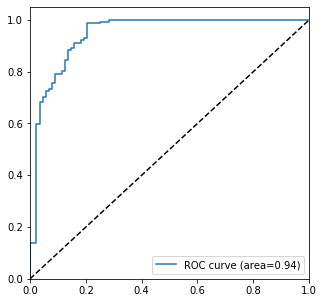

In [201]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Conversion_prob)

### Feature Engineering is done using Stats Model (RFE). 
### Logistic Regression is used for model building
### Accuracy is not the only parameter used to test model. Along with accuracy, specificity and sensivity are also the model testing parameters.

### Accuracy of model on training data is 89 percent

# Model Testing

In [206]:
X_test=X_test[col]

In [207]:
X_test.head()

,V1,V3,V5,V7,V8,V9,V11,V22,V27,V31
9,1,-0.01864,0.00000,0.00000,0.00000,0.11470,-0.45663,0.00000,0.20645,0.16595
284,1,0.29073,0.23308,0.03759,0.34336,0.12030,0.06266,-0.00280,-0.00886,0.00096
308,1,0.75564,0.83550,0.54916,0.72063,0.35225,0.13469,0.24956,-0.70352,-0.34131
56,1,1.00000,1.00000,1.00000,-0.06682,1.00000,1.00000,-0.18949,0.87280,0.78479
335,1,1.00000,1.00000,1.00000,-0.00224,1.00000,0.97763,0.09396,0.99989,1.00000


In [208]:
X_test_sm=sm.add_constant(X_test[col])

C:\Users\kosha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [209]:
X_test_sm

,const,V1,V3,V5,V7,V8,V9,V11,V22,V27,V31
9,1.0,1,-0.01864,0.00000,0.00000,0.00000,0.11470,-0.45663,0.00000,0.20645,0.16595
284,1.0,1,0.29073,0.23308,0.03759,0.34336,0.12030,0.06266,-0.00280,-0.00886,0.00096
308,1.0,1,0.75564,0.83550,0.54916,0.72063,0.35225,0.13469,0.24956,-0.70352,-0.34131
56,1.0,1,1.00000,1.00000,1.00000,-0.06682,1.00000,1.00000,-0.18949,0.87280,0.78479
335,1.0,1,1.00000,1.00000,1.00000,-0.00224,1.00000,0.97763,0.09396,0.99989,1.00000
122,1.0,1,0.73810,-0.76190,0.33333,-0.14286,0.45238,-0.67285,0.04762,0.24889,-0.66667
21,1.0,0,1.00000,0.00000,0.00000,0.00000,-1.00000,0.00000,1.00000,1.00000,-1.00000
266,1.0,1,0.76627,0.63935,0.48409,0.52500,0.15000,0.13753,0.18864,-0.33942,-0.19962
190,1.0,0,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000
0,1.0,1,0.99539,0.85243,0.83398,-0.37708,1.00000,0.85243,-0.29674,0.41078,0.42267


In [210]:
y_test_pred=res.predict(X_test_sm)

In [211]:
y_test_pred

9      4.232862e-01
284    5.235120e-01
308    9.904594e-01
56     9.467413e-01
335    9.545678e-01
122    7.148871e-01
21     7.093148e-16
266    9.524813e-01
190    6.474929e-16
0      9.442649e-01
108    1.797969e-02
272    8.938767e-01
50     7.862365e-01
177    9.077416e-01
294    8.204557e-01
208    7.551649e-01
147    9.455560e-01
133    7.142556e-01
163    9.650770e-01
24     9.405862e-01
225    9.246413e-01
29     7.329157e-19
68     9.997250e-01
19     1.519091e-12
348    9.385591e-01
278    9.197959e-01
60     9.521235e-01
179    9.355229e-01
131    6.307008e-01
161    8.633711e-01
           ...     
49     1.859656e-02
259    8.760861e-01
55     5.195827e-02
90     8.388319e-01
233    8.725435e-01
17     6.818894e-14
264    9.488635e-01
5      1.664595e-01
3      4.463349e-01
187    9.993686e-01
309    9.966391e-01
255    9.717018e-01
70     9.287028e-01
319    9.271804e-01
153    9.971559e-01
100    9.999620e-01
274    8.500030e-01
27     6.513582e-12
48     9.437700e-01


In [212]:
y_pred_1=pd.DataFrame(y_test_pred)

In [213]:
y_test_df=pd.DataFrame(y_test)
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True,inplace=True)

In [214]:
y_pred_1

,0
0,4.232862e-01
1,5.235120e-01
2,9.904594e-01
3,9.467413e-01
4,9.545678e-01
5,7.148871e-01
6,7.093148e-16
7,9.524813e-01
8,6.474929e-16
9,9.442649e-01


In [216]:
y_pred_final=pd.concat([y_pred_1,y_test_df],axis=1)

In [217]:
y_pred_final=y_pred_final.rename(columns={0:"Conversion_Prob"})

In [218]:
y_pred_final.head(7)

,Conversion_Prob,Class
0,4.232862e-01,0
1,5.235120e-01,1
2,9.904594e-01,1
3,9.467413e-01,1
4,9.545678e-01,1
5,7.148871e-01,0
6,7.093148e-16,0


In [219]:
y_pred_final["final_predicted"]=y_pred_final["Conversion_Prob"].map(lambda x: 1 if x>0.42 else 0)

In [221]:
metrics.accuracy_score(y_pred_final["Class"],y_pred_final["final_predicted"])

0.8584905660377359

### So, the model is 86 percent accurate on unseen data

### It can be concluded that model is learning good and it is neither underfitting nor overfitting as accuracy for testing and training dataset are ideal.